In [1]:
from functools import lru_cache

from mpmath import mp

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size'] = 16

In [2]:
from gwr_inversion import gwr

# Laplace Transforms

In [3]:
@lru_cache(maxsize=1024)
def lap_unit(s: float, a: float):
    # unit step transform
    return 1 / s * mp.exp(-a * s)

@lru_cache(maxsize=1024)
def lap_ln(s: float):
    # log transform
    return -mp.log(s) / s - 0.577216 / s

@lru_cache(maxsize=1024)
def lap_rad(s: float, cD: float = 0.0, skin: float = 0.0):
    # infinite-acting radial flow transform
    b = mp.besselk(0, mp.sqrt(s))
    return 1.0 / (s / (b + skin) + (s ** 2) * cD)

# Unit Step Function

#### M = 8

In [ ]:
time = 10 ** np.linspace(-1, 1, 101)
a = 1.0

M = 8
inv1 = gwr(lambda s: lap_unit(s, a), time, M)

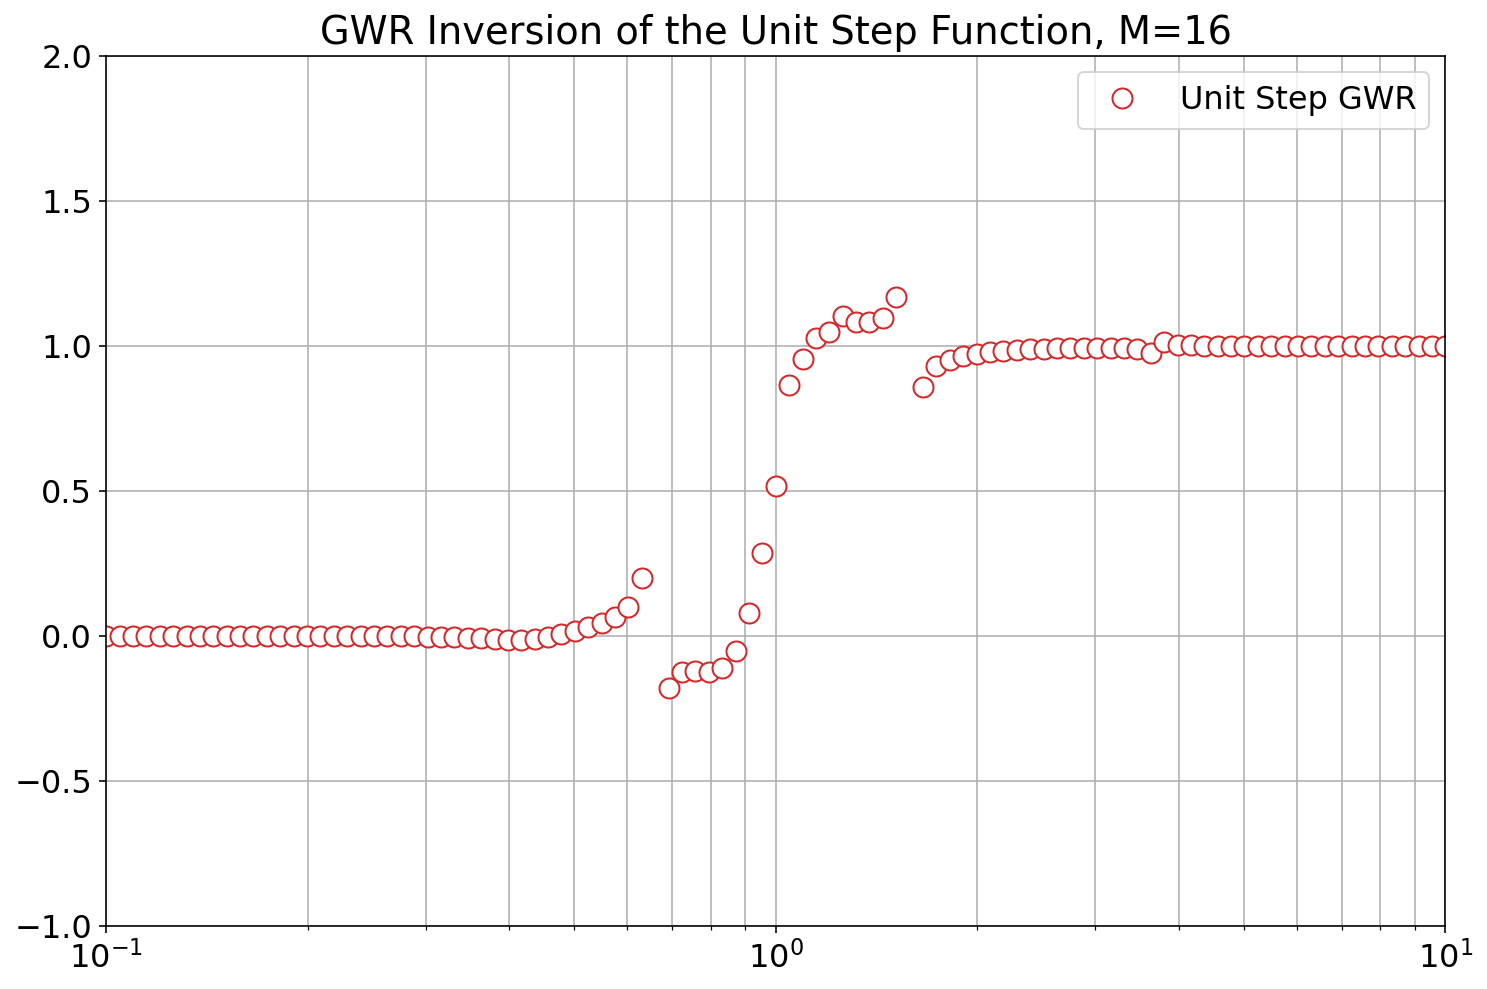

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(time, inv1, 'o', c='C3', ms=10, mfc='w', label=r'Unit Step GWR')

ax.set(xscale='log', xlim=(1e-1, 1e1), ylim=(-1, 2))

ax.grid()
ax.grid(which='minor', axis='x')

ax.legend()

plt.title(r'GWR Inversion of the Unit Step Function, M=16')

plt.savefig('Unit_Step_M_16.png', dpi=100, bbox_anchor='tight')

#### M = 128

In [5]:
M = 128
inv2 = gwr(lambda s: lap_unit(s, a), time, M)

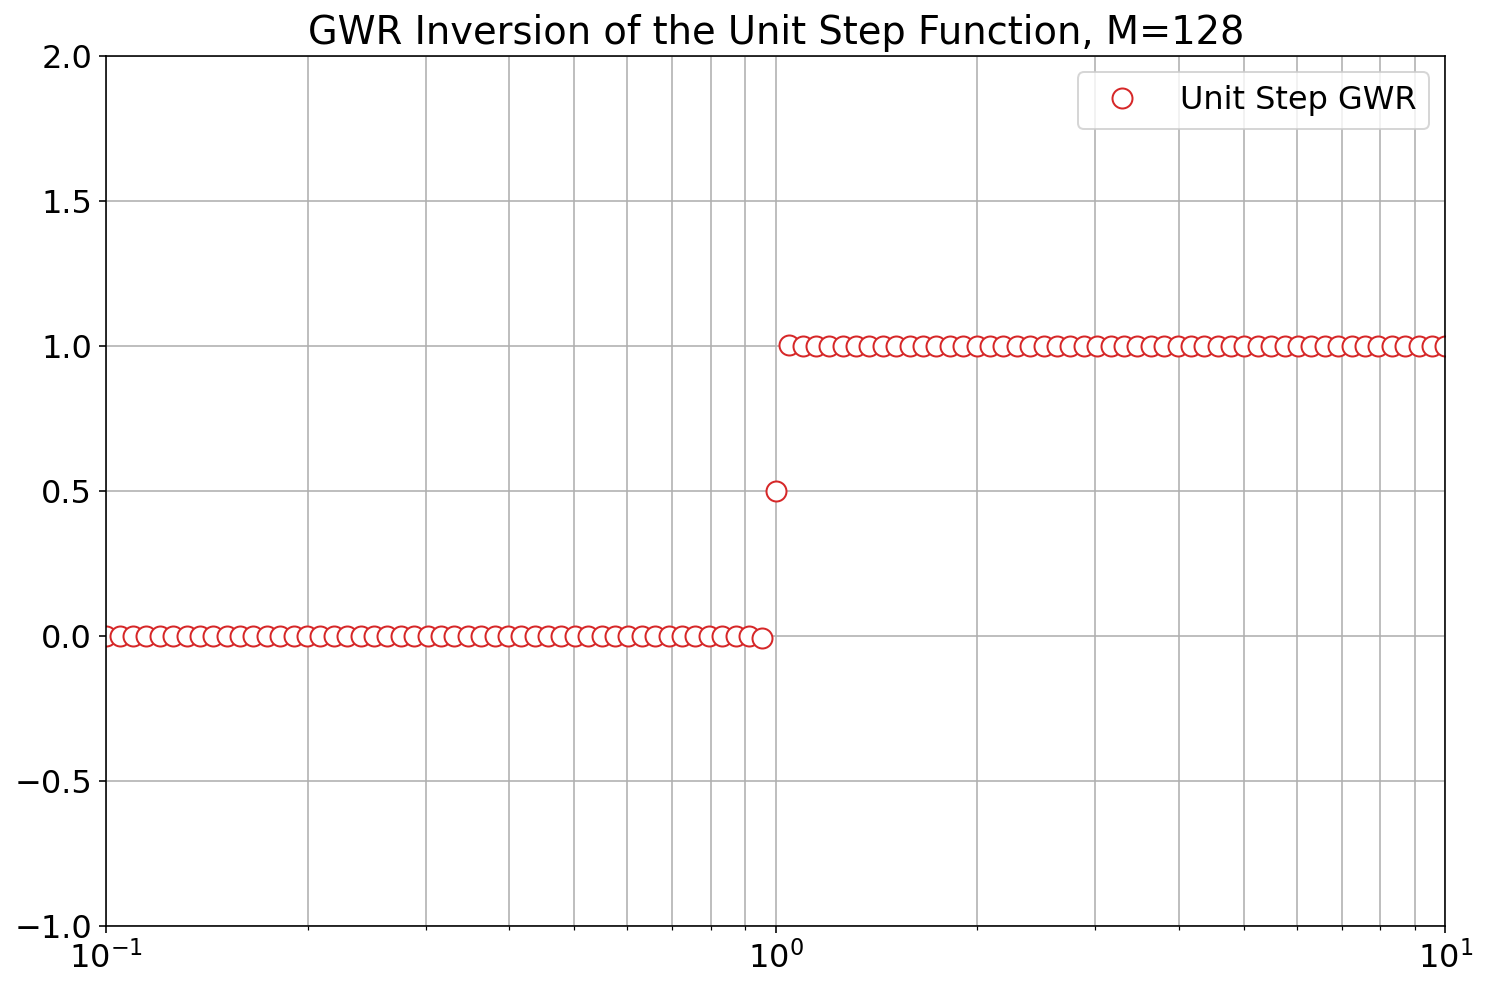

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(time, inv2, 'o', c='C3', ms=10, mfc='w', label=r'Unit Step GWR')

ax.set(xscale='log', xlim=(1e-1, 1e1), ylim=(-1, 2))

ax.grid()
ax.grid(which='minor', axis='x')

ax.legend()

plt.title(r'GWR Inversion of the Unit Step Function, M=128')

plt.savefig('Unit_Step_M_128.png', dpi=100, bbox_anchor='tight')

#### Unit Step Comparison

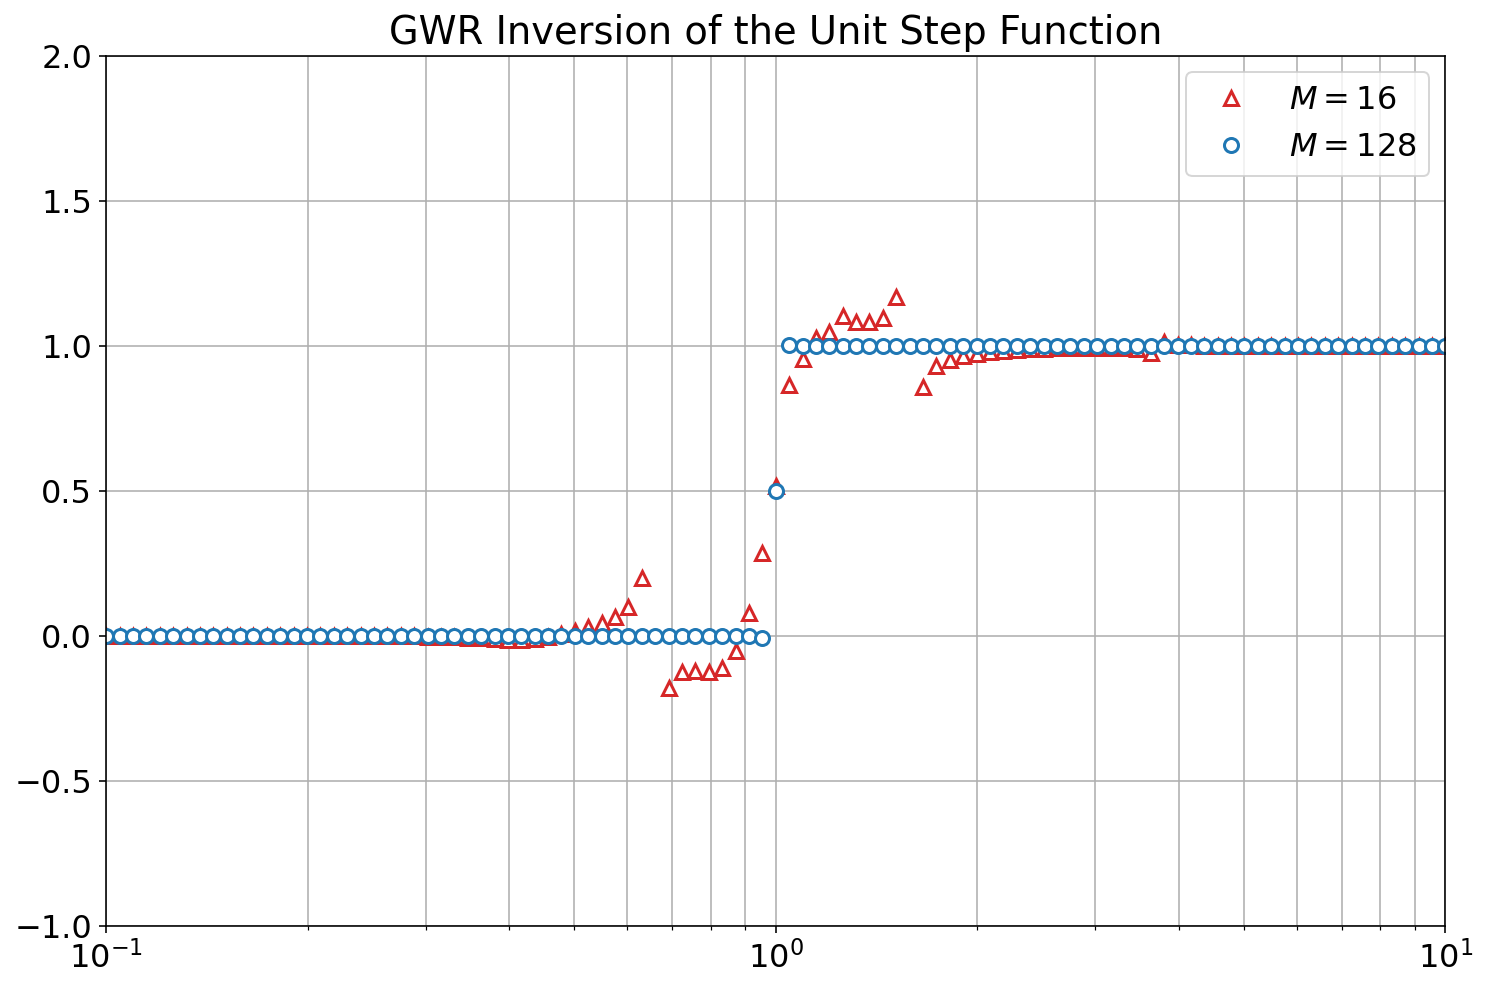

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(time, inv1, '^', c='C3', ms=7, mfc='w', mew=1.5, label=r'$M=16$')
ax.plot(time, inv2, 'o', c='C0', ms=7, mfc='w', mew=1.5, label=r'$M=128$')

ax.set(xscale='log', xlim=(1e-1, 1e1), ylim=(-1, 2))

ax.grid()
ax.grid(which='minor', axis='x')

ax.legend()

plt.title(r'GWR Inversion of the Unit Step Function')

plt.savefig('Unit_Step_comparison.png', dpi=100, bbox_anchor='tight')

# Ln[t]

In [38]:
time = 10 ** np.linspace(-2, 5, 31)
inv = gwr(lap_ln, time, 4)

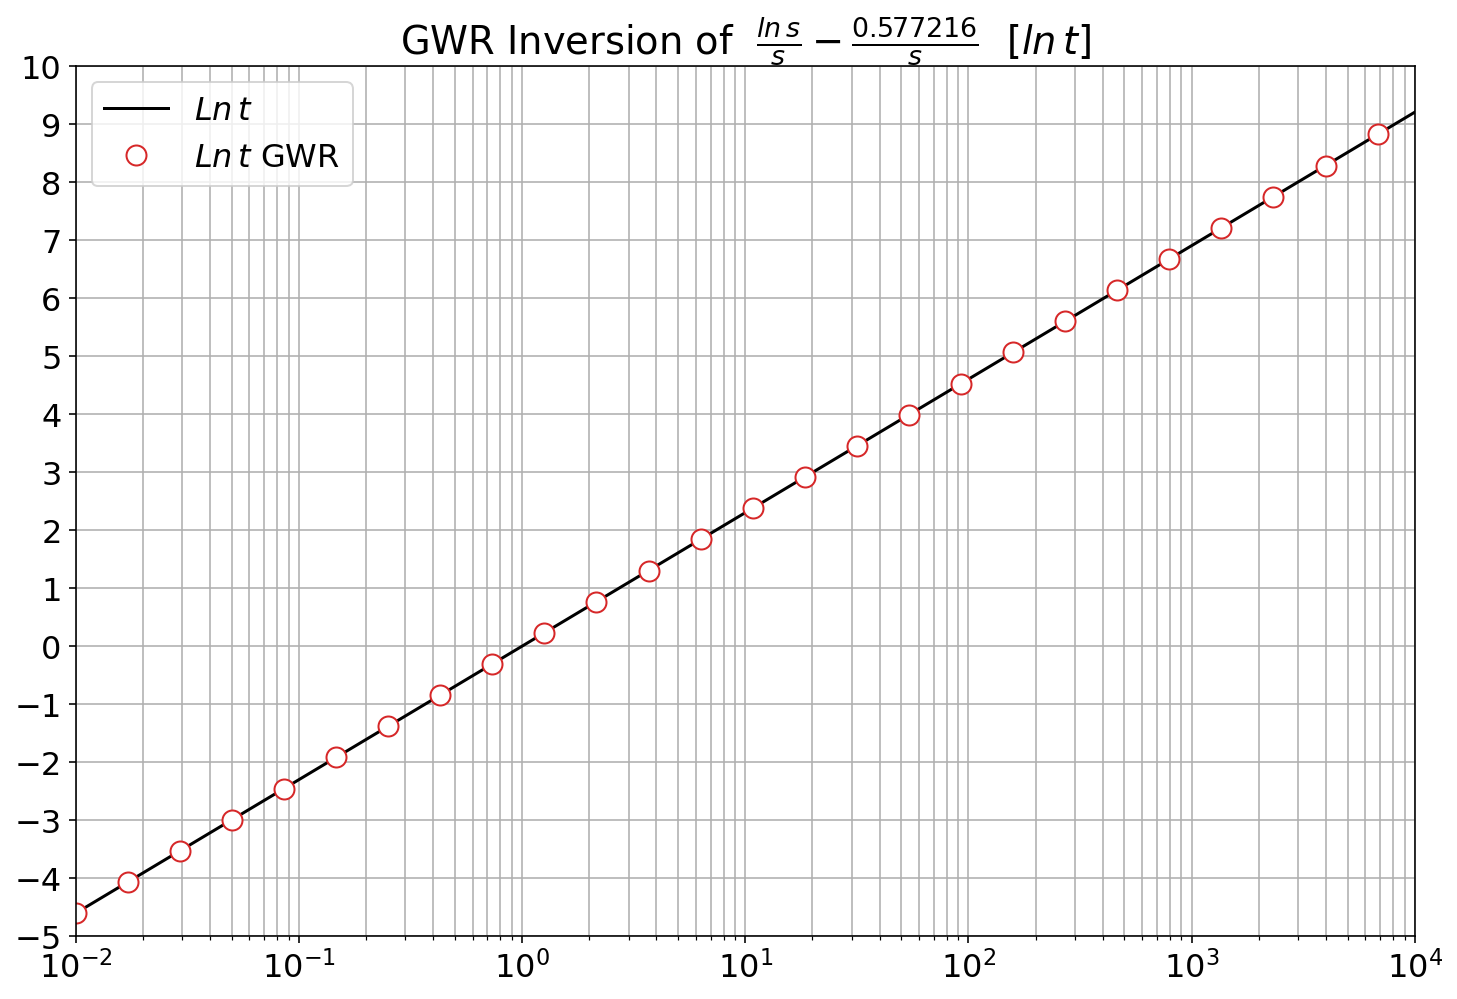

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(time, np.log(time), c='k', label=r'$Ln \, t$')
ax.plot(time, inv, 'o', c='C3', ms=10, mfc='w', label=r'$Ln \, t$ GWR')

ax.set(xscale='log', xlim=(1e-2, 1e4), ylim=(-5, 10))
ax.set_yticks(range(-5, 11))

ax.grid()
ax.grid(which='minor', axis='x')

ax.legend()

plt.title(r'GWR Inversion of  $\frac{ln \, s}{s} - \frac{0.577216}{s}$  $[ln \, t]$')

plt.savefig('Ln_t.png', dpi=100, bbox_anchor='tight')

# Infinite-Acting Radial Flow System

In [40]:
time = 10 ** np.linspace(1, 7, 31)
cD = 1e3

M = 8
inv = gwr(lambda s: lap_rad(s, cD=cD), time, M)
d1_inv = time * gwr(lambda s: s * lap_rad(s, cD=cD), time, M)
d2_inv = time * time * np.abs(gwr(lambda s: s * s * lap_rad(s, cD=cD), time, M))
int_inv = 1 / time * gwr(lambda s: 1 / s * lap_rad(s, cD=cD), time, M)

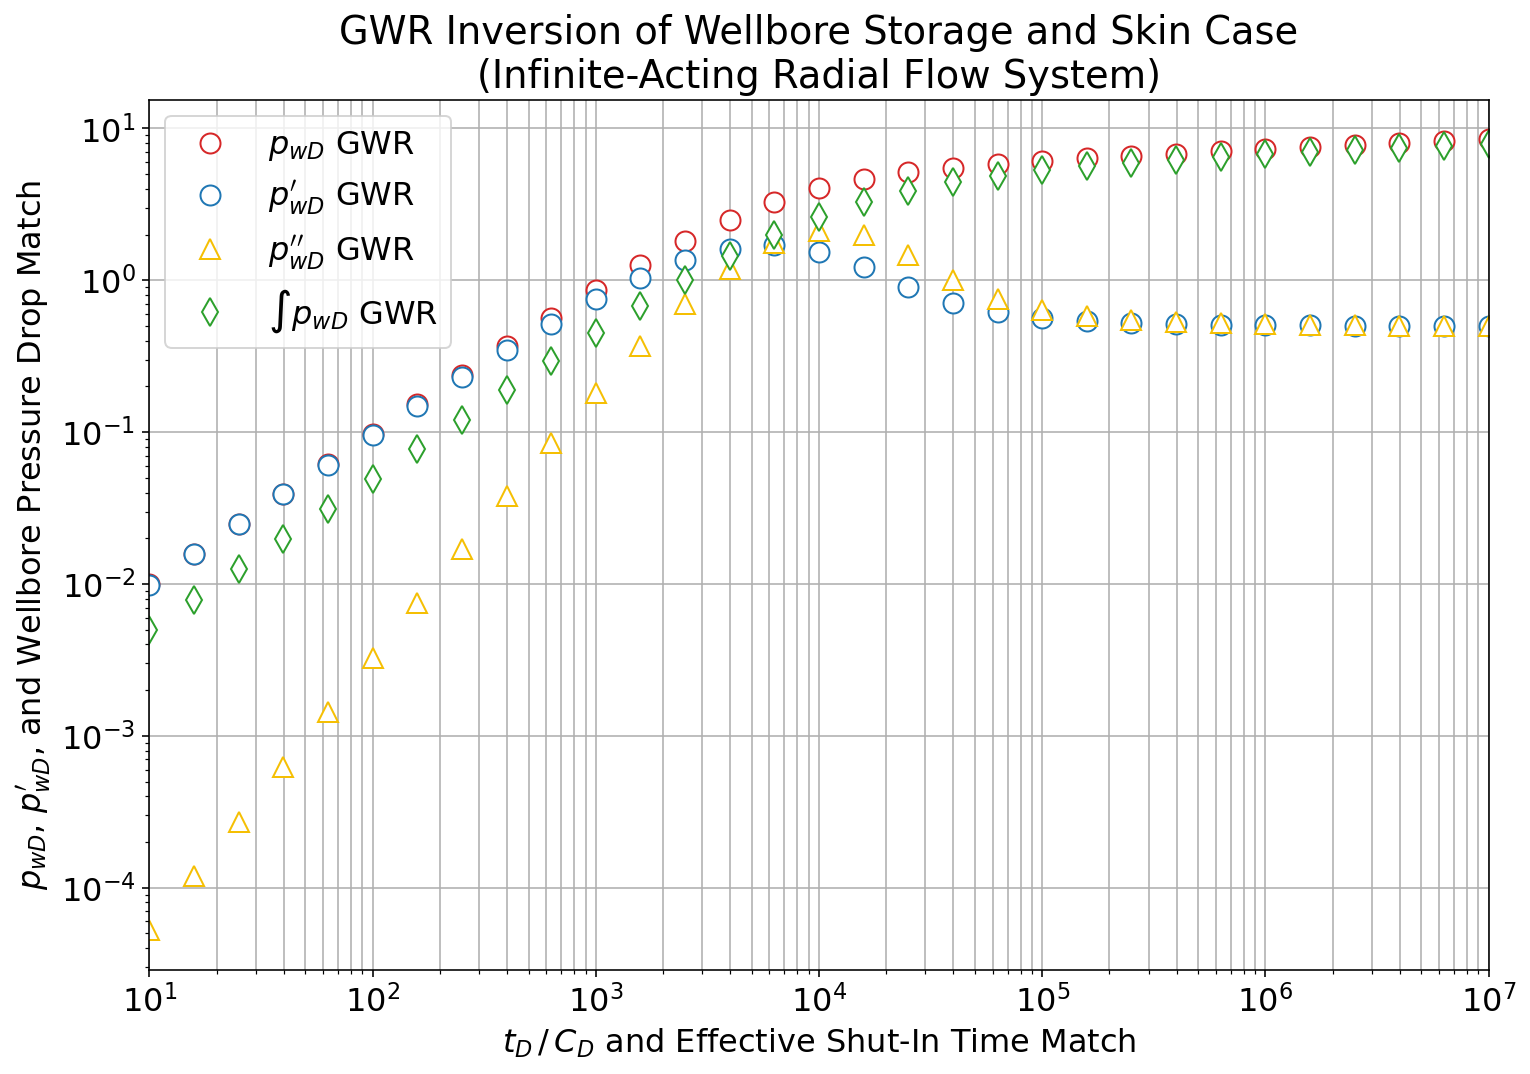

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(time, inv, 'o', c='C3', ms=10, mfc='w', label='$p_{wD}$ GWR')
ax.plot(time, d1_inv, 'o', c='C0', ms=10, mfc='w', label='$p^\prime_{wD}$ GWR')
ax.plot(time, d2_inv, '^', c='xkcd:golden', ms=10, mfc='w', label='$p^{\prime\prime}_{wD}$ GWR')
ax.plot(time, int_inv, 'd', c='C2', ms=10, mfc='w', label='$\int{p_{wD}}$ GWR')

ax.set(xscale='log', yscale='log', xlim=(1e1, 1e7))#, ylim=(1e-3, 1e1))

ax.grid()
ax.grid(which='minor', axis='x')

ax.legend()

ax.set(xlabel=r'${t_D} \, / \, {C_D}$ and Effective Shut-In Time Match')
ax.set(ylabel=r'$p_{wD}$, $p^{\prime}_{wD}$, and Wellbore Pressure Drop Match')

plt.title('GWR Inversion of Wellbore Storage and Skin Case\n(Infinite-Acting Radial Flow System)')

plt.savefig('Radial_Flow_WBS.png', dpi=100, bbox_anchor='tight')